#Graph Visualization
*Week 2 Part 1 Assignment*
*Team 2: Nathan Lim, Joel Park, Christophe Hunt, Ilya Kats, Pavan Akula

#Abstract

The goals of this assignment are

- Load a graph database of your choosing from a text file or other source.
- Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.
- Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
- Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.

#Introduction

As part of the assignment, we be presenting how to load data that has many-to-many relationship. Example: One user can have access to many reports and user can run multiple reports.

#Software

We will be using Ananconda and Spyder Python 2.7 version as a development platform. Jupyter notebook for documentation. Neo4j graph database is used to showcase this project.

#Data Source

We will be using large network dataset from https://snap.stanford.edu/data/. Data releted to California roads. Intersections and endpoints are represented by nodes and the roads connecting these intersections or road endpoints are represented by undirected edges.

#Packages used

- pandas
- py2neo
- ipython-cypher
- networkx
- matplotlib
- graphviz
- Pydot

#Extract small subset of data

In [ ]:
#Download dataset
#https://snap.stanford.edu/data/roadNet-CA.html

#Read nodes where Id is less than 50
#Get information about all connected nodes

#Convert many-to-many relationship to one column.
#In From and To are related to roads that combined in single column
#Example: Road 1 is connected to roads 0, 6 and 385. Road 6 is connected to roads 1 and 5.

import pandas as pd
import py2neo as pn
%load_ext cypher
import networkx as nx
import matplotlib.pyplot as plt

"""
road = pd.read_table("D:/CUNY/620/Week02/roadNet-CA.txt", sep='\t', skiprows=4)
road.columns = ['FromNodeId','ToNodeId']

requiredData = road[road.FromNodeId < 50]

for i in range(4):
    tempToData = pd.DataFrame(requiredData.ToNodeId.unique())
    tempFromData = pd.DataFrame(requiredData.FromNodeId.unique())
    tempFromData.columns = ['FromNodeId']
    for index, row in tempToData.iterrows():
        if not (tempFromData['FromNodeId'] == row[0]).any():
            tmpDf = road[road.FromNodeId == row[0]]
            frames = [requiredData, tmpDf]
            requiredData = pd.concat(frames)


uniqueFrom = pd.DataFrame(requiredData.FromNodeId.unique())
uniqueFrom.columns = ['roadId']

uniqueTo = pd.DataFrame(requiredData.ToNodeId.unique())
uniqueTo.columns = ['roadId']

frames = [uniqueFrom, uniqueTo]
uniqueDf = pd.concat(frames)

uniqueDf = pd.DataFrame(uniqueDf.roadId.unique())
uniqueDf.reset_index(drop=True, inplace=True)
uniqueDf.index = uniqueDf.index + 1
uniqueDf.columns = ['roadNum']

requiredData.reset_index(drop=True, inplace=True)
requiredData.index = requiredData.index + 1

requiredData.to_csv("D:/Pavan/Neo4jdb/import/roadNetCA.csv", sep=',', index=True, index_label='id')
uniqueDf.to_csv("D:/Pavan/Neo4jdb/import/roadCA.csv", sep=',', index=True, index_label = 'id')
"""

#Upload files to GitHub

#Load data into Neo4j graph database

In [ ]:
#Run following code in Neo4j shell

"""
// Unique roads of California
USING PERIODIC COMMIT
LOAD CSV WITH HEADERS FROM "https://raw.githubusercontent.com/ilyakats/CUNY-DATA620/master/data/roadCA.csv" AS row
CREATE (:road {roadNum: TOINT(row.roadNum),_id: TOINT(row.id)});

//Create index
CREATE INDEX ON :road(roadNum);

//Load data that has relation between from and to
USING PERIODIC COMMIT
LOAD CSV WITH HEADERS FROM "https://raw.githubusercontent.com/ilyakats/CUNY-DATA620/master/data/roadNetCA.csv" AS row
MATCH (roadNetFrom:road {roadNum: TOINT(row.FromNodeId)})
MATCH (roadNetTo:road {roadNum: TOINT(row.ToNodeId)})
MERGE (roadNetFrom)-[:TO]->(roadNetTo);
"""

#Extract data from Neo4j using ipython-cypher

In [1]:
#Extract data from Neo4j

%load_ext cypher

results = %cypher MATCH (roadNetFrom:road)-[r:TO]->(roadNetTo:road)
RETURN roadNetFrom.roadNum AS From, roadNetTo.roadNum AS To 
ORDER BY roadNetFrom.roadNum, roadNetTo.roadNum LIMIT 25;

df = results.get_dataframe()

df

25 rows affected.


,From,To
0,0,2
1,0,469
2,1,0
3,1,6
4,1,385
5,2,0
6,2,3
7,3,2
8,3,4
9,3,419


#Display Graph

25 rows affected.


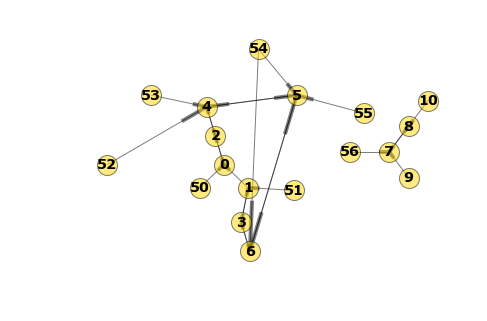

In [7]:
from networkx.drawing.nx_pydot import graphviz_layout
%matplotlib inline
#Read data from Neo4j

results = %cypher MATCH p=(roadNetFrom:road)-[r:TO]->(roadNetTo:road) RETURN p LIMIT 25;

g = results.get_graph()
pos = graphviz_layout(g, prog="twopi", root=0)
nx.draw(g, pos,font_size=14,font_family='Verdana',font_weight='bold',node_size=400,node_color='gold',with_labels=True,alpha=0.5)
plt.show()